# Lab 6

## Support Vector Machines

### General Explanation

Recall (or quickly learn): That a hyperplane can be defined by a normal vector $\mathbf{w}$ and an offset $b$.

A SVM is a linear binary classification model used to represent a hypothesis, $h(\mathbf{x})$, that predicts the class, $\hat{y} \in \{-1, +1\}$, of sample $x$ is of the following form:

$$ h(\mathbf{x}) = \text{sign}(\mathbf{w} \cdot \mathbf{x} + b) $$

The intuition behind SVM is a geometric one where the following equation is representative of the hyperplane that separates the two classes:

$$\mathbf{w} \cdot \mathbf{x} + b = 0$$

That is to say that for a given $x$, when this equation is satisfied $x$ lies on the hyperplane. 


### Explanation of Support Vectors

In order to help determine which values to choose for $\mathbf{w}$ and $b$ we introduce the concept of support vectors.

Consider two other hyperplanes: $\mathbf{w} \cdot \mathbf{x} + b = -1$ and $\mathbf{w} \cdot \mathbf{x} + b = 1$ corresponding to the repsective classes. 

Specifically, they are chosen such that the closest point(s) to the hyperplane $\mathbf{w} \cdot \mathbf{x} + b = \underline{-1}$ are point(s) with label $y = \underline{-1}$ and the closest point(s) to the hyperplane $\mathbf{w} \cdot \mathbf{x} + b = \underline{1}$ are point(s) with label $y = \underline{1}$.

The point(s) that are the closest to each of these hyperplanes are called the support vectors as they help "support" the optimal hyperplane.



### SVM as a Linear Program

The distances from the optimal hyperplane to the support vectors is called the margin and is defined as:

$$\frac{1}{||\mathbf{w}||}$$

The optimal hyperplane has the maximum possible margin.

This is equivalent to minimizing $||\mathbf{w}||$ , or any scalar multiple of it (commonly $\frac{1}{2}$), subject to the following constraints:

$$ y_k(\mathbf{w} \cdot \mathbf{x}_k + b) \geq 1$$ 

Where is $k \in [1,m]$ and we have $m$ training samples.

All this is saying is that all $k$ points in the training set must be either a support vector, distance 1 from the hyper plane, or further.

Note that for an optimal solution, at least one point $\mathbf{x}$ in the training set  will have $y(\mathbf{w} \cdot \mathbf{x} + b) = 1$.

### Allowing for Errors

Hard Margin SVM:

$$ \text{min}_{\mathbf{w}, b} \frac{1}{2} \mathbf{w} \cdot \mathbf{w}$$

Subject to:

$$ y_k(\mathbf{w} \cdot \mathbf{x}_k + b) \geq 1$$ 
$$k \in [1,m]$$

Soft Margin SVM:

$$ \text{min}_{\mathbf{w}, b, \mathbf{\xi}} \frac{1}{2} \mathbf{w} \cdot \mathbf{w} + C\sum_{k=1}^{m}\xi_k$$

Subject to:

$$ y_k(\mathbf{w} \cdot \mathbf{x}_k + b) \geq 1 - \xi_k $$ 
$$ \xi_k \geq 0 $$
$$k \in [1,m]$$

$\xi_k$ is called a slack variable and every data point gets one.

Think of it as how much closer we allow a point to be compared to the support vectors.

If $\xi_k = 0$ then $\mathbf{x}_k$ is a support vector.

If $0 < \xi_k < 1$ then $\mathbf{x}_k$ lies "between" the hyperplane and it's class's support vector.

If $1 < \xi_k < 2$ then $\mathbf{x}_k$ lies on the wrong "side" of the hyperplane, between" the hyperplane and the opposite class's support vector.

C is another hyper parameter and represents how much we wish to minimize the slack we give.

If C is large we put a large emphasis on minimizing slack, and therefore less emphasis on producing a good margin. This can lead to overfitting.

If C is small we don't pay as much attention to minimizing slack, and instead focus on producing a good margin. This can lead to underfitting.

### Kernel Trick

Allows for a computationally efficient method of measuring "infinite dimensional" similarity between points and allows SVM's to work well on non-linearly seperable data via feature mapping.

Out of scope for this course, so just know that the kernel you will use is the Gaussian Kernel, also called the Radial Basis Function Kernel and that it is an expression of similarity and produces output in the range [0,1].

It has another hyperparamter $\gamma$ which is a coefficient for the result of the kernel.

If $\gamma$ is small then we have "simpler" boundaries and may underfit the data.

If $\gamma$ is large then we have "irregular" boundaries and may overfit the data.

## Example

In [54]:
# Imports and helper functions 
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np

def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = 35,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    plt.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = 25,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.legend(['label 1','label 0'])

def plot_model(X, y, model):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,colors = 'k',linewidths = 3)
    plot_points(X, y)
    plt.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
    plt.show()

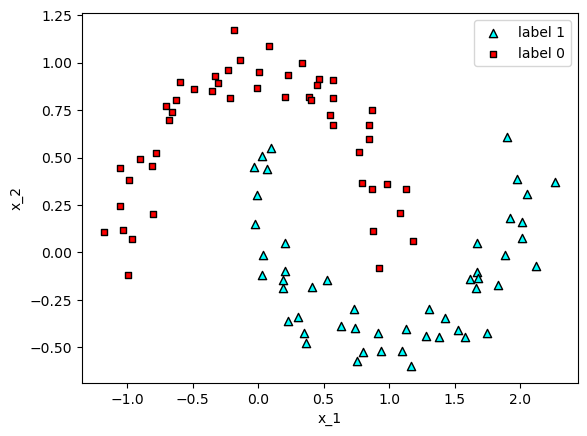

In [55]:
# Generate a dataset with 100 samples, noise level of 0.1, and a random state for reproducibility
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Plot the dataset
plot_points(X,y)

In [56]:
# Create arrays of possible hyperparameter values and print them
C_values = np.logspace(start = -3, stop = 3, base = 10, num = 7)
gamma_values = np.logspace(start = -3, stop = 3, base = 10, num = 7)

print(C_values)
print(gamma_values)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


C: 1.0 , Gamma: 0.001


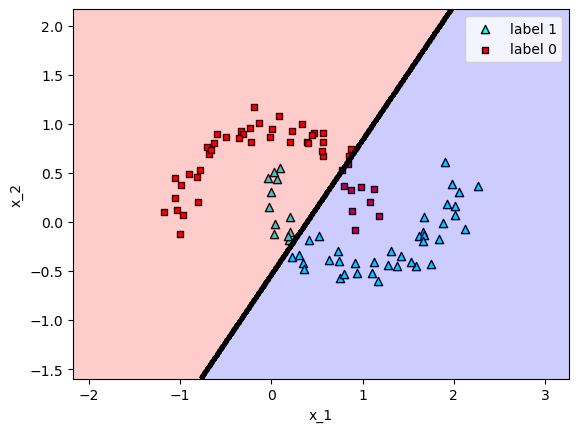

Accuracy: 0.79


In [57]:
# Create a SVM Classifier with arbitrary C and gamma
C_val_index = 3
gamma_val_index = 0

svm = SVC(C = C_values[C_val_index], gamma = gamma_values[gamma_val_index], kernel='rbf')

# Fit it to the data
svm.fit(X,y)

# Print C and Gamma Values and plot the resulting hyperplane
print(f'C: {C_values[C_val_index]} , Gamma: {gamma_values[gamma_val_index]}')
plot_model(X,y,svm)

# Print the accuracy
print(f'Accuracy: {svm.score(X,y)}')

Let's try increasing gamma to place more value on the kernel.

C: 1.0 , Gamma: 1.0


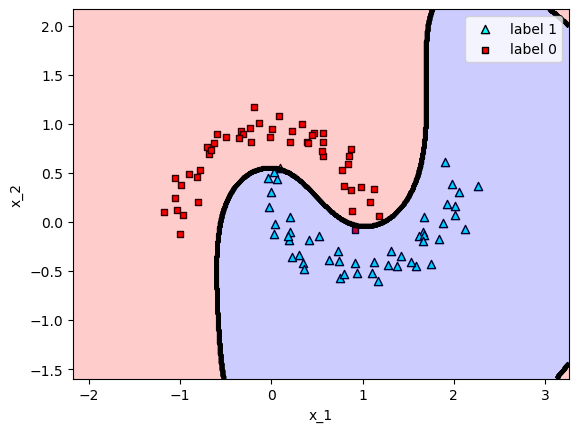

Accuracy: 0.98


In [58]:
# Create a SVM Classifier with arbitrary C and gamma
C_val_index = 3
gamma_val_index = 3

svm = SVC(C = C_values[C_val_index], gamma = gamma_values[gamma_val_index], kernel='rbf')

# Fit it to the data
svm.fit(X,y)

# Print C and Gamma Values and plot the resulting hyperplane
print(f'C: {C_values[C_val_index]} , Gamma: {gamma_values[gamma_val_index]}')
plot_model(X,y,svm)

# Print the accuracy
print(f'Accuracy: {svm.score(X,y)}')

Maybe a little too general let's make sure we care a bit more about how much slack is minimized by increasing C.

C: 1000.0 , Gamma: 1.0


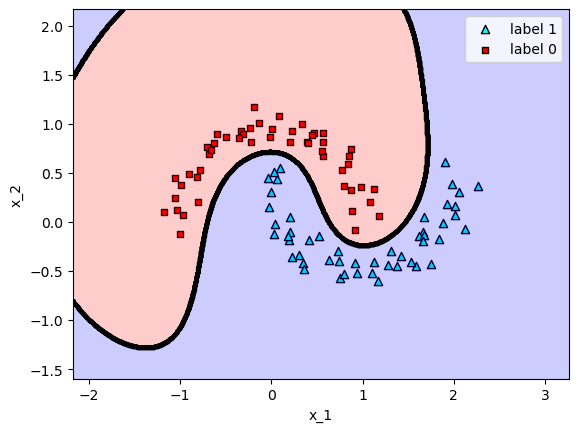

Accuracy: 1.0


In [59]:
# Create a SVM Classifier with arbitrary C and gamma
C_val_index = 6
gamma_val_index = 3

svm = SVC(C = C_values[C_val_index], gamma = gamma_values[gamma_val_index], kernel='rbf')

# Fit it to the data
svm.fit(X,y)

# Print C and Gamma Values and plot the resulting hyperplane
print(f'C: {C_values[C_val_index]} , Gamma: {gamma_values[gamma_val_index]}')
plot_model(X,y,svm)

# Print the accuracy
print(f'Accuracy: {svm.score(X,y)}')

Maybe we should try just letting the kernel do it's thing?

C: 1.0 , Gamma: 1000.0


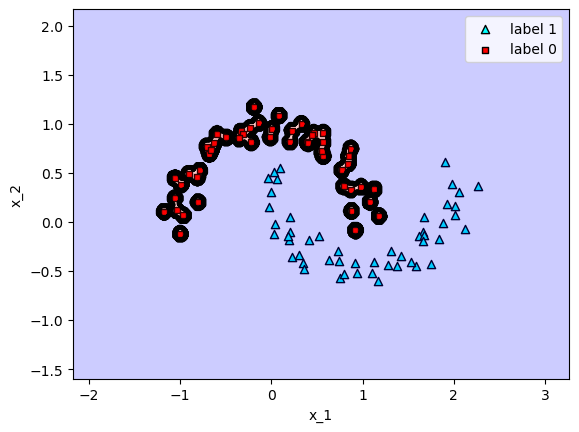

Accuracy: 1.0


In [60]:
# Create a SVM Classifier with arbitrary C and gamma
C_val_index = 3
gamma_val_index = 6

svm = SVC(C = C_values[C_val_index], gamma = gamma_values[gamma_val_index], kernel='rbf')

# Fit it to the data
svm.fit(X,y)

# Print C and Gamma Values and plot the resulting hyperplane
print(f'C: {C_values[C_val_index]} , Gamma: {gamma_values[gamma_val_index]}')
plot_model(X,y,svm)

# Print the accuracy
print(f'Accuracy: {svm.score(X,y)}')

As you can see changing C and gamma can produce very different results.

## STUDENT SECTION

Please experiment with different values of C and $\gamma$ to produce, what you feel is good hyperplane. Try to balance for accuracy and overfitting.

C: 100 , Gamma: 0.5


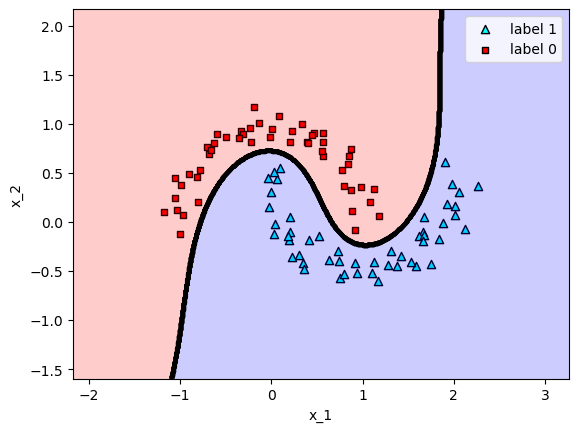

Accuracy: 1.0


In [61]:
# Create a SVM Classifier with arbitrary C and gamma
C = 100
gamma = 0.5

svm = SVC(C = C, gamma = gamma, kernel='rbf')


# Fit it to the data
svm.fit(X,y)


# Print C and Gamma Values and plot the resulting hyperplane
print(f'C: {C} , Gamma: {gamma}')
plot_model(X,y,svm)



# Print the accuracy
print(f'Accuracy: {svm.score(X,y)}')


**ONLY AFTER** you have found what you think is a "good" model generate some slightly noisier new data points using make_moons and see how your model performs on that. 

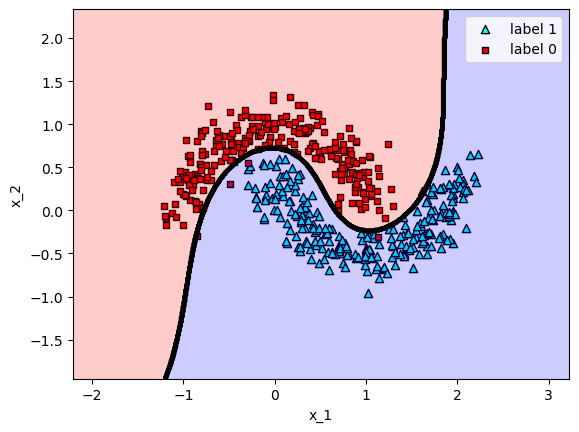

Accuracy: 0.986


In [62]:
# Generate a new dataset with 500 samples with a noise level of 0.15 and a random state of 0
X, y = make_moons(n_samples=500, noise=0.15, random_state=0)



# Plot the new data against your model
plot_model(X,y,svm)



# Print the accuracy
print(f'Accuracy: {svm.score(X,y)}')
